In [2]:
# Familiar imports
import numpy as np
import pandas as pd

# For ordinal encoding categorical variables, splitting data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

# For training random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, roc_auc_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge

In [3]:
# Load the training data
rawtrain = pd.read_csv("../input/tabular-playground-series-oct-2021/train.csv", index_col=0)
rawtest = pd.read_csv("../input/tabular-playground-series-oct-2021/test.csv", index_col=0)

In [4]:
train = rawtrain.copy()
y = train['target']
features = train.drop(['target'], axis=1)

In [5]:
X = features.copy()
X.shape

(1000000, 285)

In [6]:
test = rawtest.copy()
test.shape

(500000, 285)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from keras import backend as K
import tensorflow as tf

In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9725861413118818196
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9898950656
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6931080311734750086
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:2a:00.0, compute capability: 8.6"
]


In [9]:
input_shape = [X.shape[1]]

def create_model():
    model = keras.Sequential([
        layers.BatchNormalization(input_shape = input_shape),
        layers.Dense(units = 64, activation = 'relu'),
        layers.BatchNormalization(),
        layers.Dropout(rate = 0.3),
        
        layers.Dense(units = 1, activation = 'hard_sigmoid')
    ])
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC()]
    ) 
    return model

In [10]:
X.shape[0]*0.01

10000.0

In [11]:
from numba import cuda

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:2a:00.0, compute capability: 8.6



0it [00:00, ?it/s]

Epoch 1/50
134/134 [==============================] - 3s 14ms/step - loss: 1.0635 - auc: 0.5622 - val_loss: 0.6509 - val_auc: 0.7193
Epoch 2/50
134/134 [==============================] - 1s 10ms/step - loss: 0.7643 - auc: 0.6436 - val_loss: 0.6111 - val_auc: 0.7750
Epoch 3/50
134/134 [==============================] - 1s 10ms/step - loss: 0.6957 - auc: 0.6945 - val_loss: 0.5896 - val_auc: 0.7788
Epoch 4/50
134/134 [==============================] - 1s 10ms/step - loss: 0.6598 - auc: 0.7224 - val_loss: 0.5744 - val_auc: 0.7890
Epoch 5/50
134/134 [==============================] - 1s 10ms/step - loss: 0.6321 - auc: 0.7460 - val_loss: 0.5699 - val_auc: 0.7916
Epoch 6/50
134/134 [==============================] - 1s 10ms/step - loss: 0.6283 - auc: 0.7454 - val_loss: 0.5721 - val_auc: 0.7881
Epoch 7/50
134/134 [==============================] - 1s 10ms/step - loss: 0.6059 - auc: 0.7636 - val_loss: 0.5555 - val_auc: 0.8046
Epoch 8/50
134/134 [==============================] - 1s 10ms/step - 

1it [01:23, 83.26s/it]

Epoch 1/50
134/134 [==============================] - 2s 14ms/step - loss: 1.1985 - auc: 0.5900 - val_loss: 0.6300 - val_auc: 0.7666
Epoch 2/50
134/134 [==============================] - 1s 10ms/step - loss: 0.7961 - auc: 0.6810 - val_loss: 0.5967 - val_auc: 0.7759
Epoch 3/50
134/134 [==============================] - 1s 10ms/step - loss: 0.7662 - auc: 0.6832 - val_loss: 0.6016 - val_auc: 0.7608
Epoch 4/50
134/134 [==============================] - 1s 10ms/step - loss: 0.7082 - auc: 0.6980 - val_loss: 0.5898 - val_auc: 0.7696
Epoch 5/50
134/134 [==============================] - 1s 9ms/step - loss: 0.6712 - auc: 0.7170 - val_loss: 0.5810 - val_auc: 0.7792
Epoch 6/50
134/134 [==============================] - 1s 9ms/step - loss: 0.6426 - auc: 0.7376 - val_loss: 0.5676 - val_auc: 0.7936
Epoch 7/50
134/134 [==============================] - 1s 9ms/step - loss: 0.6332 - auc: 0.7460 - val_loss: 0.5649 - val_auc: 0.7962
Epoch 8/50
134/134 [==============================] - 1s 9ms/step - loss

2it [02:44, 82.05s/it]

Epoch 1/50
134/134 [==============================] - 2s 12ms/step - loss: 0.9953 - auc: 0.6321 - val_loss: 0.6149 - val_auc: 0.7662
Epoch 2/50
134/134 [==============================] - 1s 9ms/step - loss: 0.6867 - auc: 0.7151 - val_loss: 0.5918 - val_auc: 0.7874
Epoch 3/50
134/134 [==============================] - 1s 9ms/step - loss: 0.6330 - auc: 0.7408 - val_loss: 0.5652 - val_auc: 0.8012
Epoch 4/50
134/134 [==============================] - 1s 9ms/step - loss: 0.6077 - auc: 0.7636 - val_loss: 0.5539 - val_auc: 0.8099
Epoch 5/50
134/134 [==============================] - 1s 9ms/step - loss: 0.5910 - auc: 0.7746 - val_loss: 0.5480 - val_auc: 0.8129
Epoch 6/50
134/134 [==============================] - 1s 9ms/step - loss: 0.5752 - auc: 0.7894 - val_loss: 0.5343 - val_auc: 0.8212
Epoch 7/50
134/134 [==============================] - 1s 9ms/step - loss: 0.5645 - auc: 0.7999 - val_loss: 0.5315 - val_auc: 0.8229
Epoch 8/50
134/134 [==============================] - 1s 9ms/step - loss: 0

3it [04:12, 84.02s/it]


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

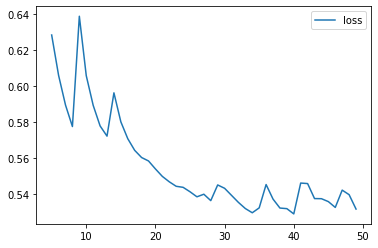

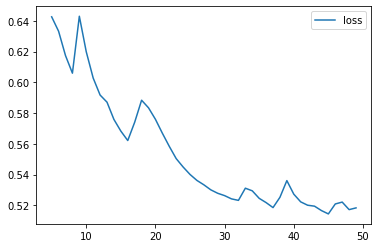

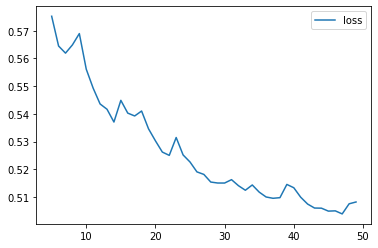

In [12]:
spl = 5
kf = StratifiedKFold(n_splits=spl, shuffle=True)
test_pred_total = np.zeros((len(test),1))
mse = []

y_preds = []
yvs = []

train_idxs = []
valid_idxs = []

stopping_rounds = 400
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
model = create_model()
init_weights = model.get_weights()
for train_idx, valid_idx in tqdm(kf.split(X,y.round(-1))):
        train_idxs.append(train_idx)
        valid_idxs.append(valid_idx)
        Xt = X.iloc[train_idx, :]
        yt = y.iloc[train_idx]
        Xv = X.iloc[valid_idx, :]
        yv = y.iloc[valid_idx]
        yvs.append(yv)
        early_stopping = callbacks.EarlyStopping(
            min_delta=0.001, # minimium amount of change to count as an improvement
            patience=20, # how many epochs to wait before stopping
            restore_best_weights=True,
        )
        
        history = model.fit(Xt, yt, validation_data=(Xv, yv), callbacks = [early_stopping], 
                            batch_size=6000, epochs=50)
        history_df = pd.DataFrame(history.history)
        # Start the plot at epoch 5. You can change this to get a different view.
        history_df.loc[5:, ['loss']].plot();
        y_pred = model.predict(Xv)
        y_preds.append(y_pred)
        valid_mse = roc_auc_score(yv, y_pred)
        mse.append(valid_mse)
        print("valid mse", valid_mse)
        test_pred = model.predict(test) / spl
        test_pred_total += test_pred
        model.set_weights(init_weights)
        K.clear_session()
test_pred_total = test_pred_total.reshape((len(test),))
print("all valid mse", mse, " min ", min(mse), " max ", max(mse), " avg ", sum(mse)/len(mse))

In [ ]:
Xv

In [34]:
yv

id
1         0
13        1
32        0
40        1
42        1
         ..
957900    1
957902    1
957906    1
957913    1
957916    0
Name: claim, Length: 95792, dtype: int64